<a href="https://colab.research.google.com/github/FlavioAugusty/Dojo---Hype/blob/main/exec%C3%ADcios/projeto_de_an%C3%A1lise_de_dados_dupla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.00,1.00,138,0,0,12,0
132,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107,0
128,61.0,0,248,0,30,1,267000.00,0.70,136,1,1,104,0
272,67.0,0,213,0,38,0,215000.00,1.20,133,0,0,245,0
138,62.0,0,281,1,35,0,221000.00,1.00,136,0,0,108,0
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
293,63.0,1,103,1,35,0,179000.00,0.90,136,1,1,270,0
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
80,70.0,0,69,0,40,0,293000.00,1.70,136,0,0,75,0
62,55.0,0,109,0,35,0,254000.00,1.10,139,1,1,60,0


In [ ]:
df.shape

(299, 13)

age: Idade do paciente em anos

anemia: Sem = 0, Com = 1

creatinine_pjosphokinase: mcg/L

diabetes: Sem = 0, Com = 1

ejection_fraction:  %

high_blood_pressure: Sem = 0, Com = 1

plateletes: kiloplatelets/mL

serum_creatinine: mg/dL

serum_sodium: mEq/L

sex: mulher = 0, homem = 1

smoking: Não = 0, Sim = 1

time: tempo acompanhado em dias

DEATH_EVENT: Não = 0, Sim = 1

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df['sex'].value_counts()

,count
sex,
1,194
0,105


A partir do describe podemos retirar as seguintes informações do nosso dataset:

aproximadamente 65% são homens, confirmado sendo 194 homens e 105 mulheres.

aproximadamente 42% possuem diabetes.

aproximadamente 45% tem pressão alta.

aproximadamente 32% fumam.

aproximadamente 43% possuem anemia.


<Axes: >

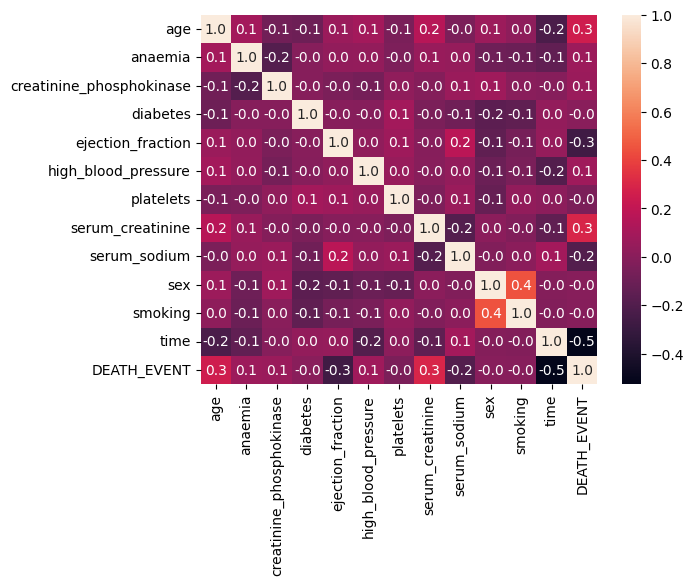

In [ ]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt=".1f")

Pelo mapa de calor podemos notar as principais correlações:

1. Pessoas que tiveram um período de acompanhamento curto apresentaram altas chances de morrerem, enquanto as acompanhadas por um período longo possui uma têndencia a sobreviver. (Possivelmente devido ao bom cuidado ao passar dos dias, ou o paciente logo após sofrer com a falha cardíaca, após pouco tempo morreu, impossibilitando o acompanhamento longo).

2. O gênero que teve mais têndencia a fumar foi o masculino.

3. Pacientes mais velhos, apresentaram mais mortes.

4. Pacientes com altas taxas de creatina, apresentaram mais mortes.

5. Pacientes com fração de ejeção elevada, apresentaram menos mortes.

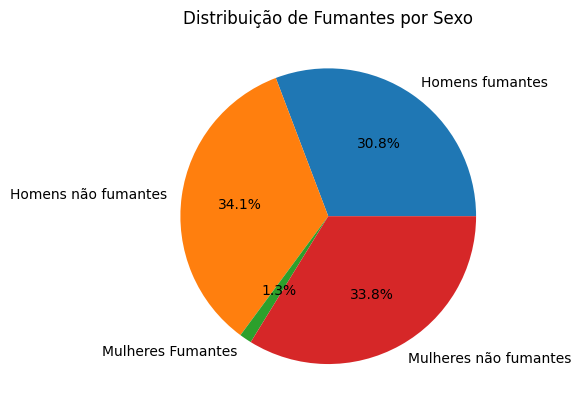

In [ ]:
FumaH = df[(df['smoking'] == 1) & (df['sex'] ==1)] #seleção da classe 1

NfumaH = df[(df['smoking'] == 0) & (df['sex'] ==1)] #seleção da classe 1

FumaM = df[(df['smoking'] == 1) & (df['sex'] ==0)] #seleção da classe 0

NfumaM = df[(df['smoking'] == 0) & (df['sex'] ==0)] #seleção da classe 0

# Calculo das contagens que desejo representar no gráfico de pizza
contagens = [len(FumaH), len(NfumaH), len(FumaM), len(NfumaM)]
rotulos = ['Homens fumantes', 'Homens não fumantes', 'Mulheres Fumantes', 'Mulheres não fumantes']

plt.pie(contagens, labels=rotulos, autopct='%1.1f%%')
plt.title('Distribuição de Fumantes por Sexo')
plt.show()

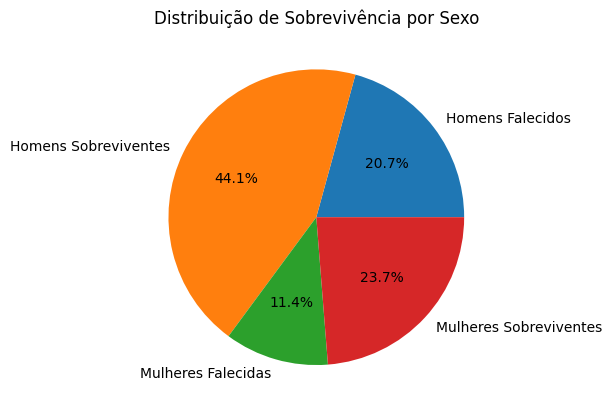

In [ ]:
NsurviveH = df[(df['DEATH_EVENT'] == 1) & (df['sex'] ==1)] #seleção da classe 1

surviveH = df[(df['DEATH_EVENT'] == 0) & (df['sex'] ==1)] #seleção da classe 1

NsurviveM = df[(df['DEATH_EVENT'] == 1) & (df['sex'] ==0)] #seleção da classe 0

surviveM = df[(df['DEATH_EVENT'] == 0) & (df['sex'] ==0)] #seleção da classe 0

# Calculo das contagens que desejo representar no gráfico de pizza
contagens = [len(NsurviveH), len(surviveH), len(NsurviveM), len(surviveM)]
rotulos = ['Homens Falecidos', 'Homens Sobreviventes', 'Mulheres Falecidas', 'Mulheres Sobreviventes']

plt.pie(contagens, labels=rotulos, autopct='%1.1f%%')
plt.title('Distribuição de Sobrevivência por Sexo')
plt.show()

Depois de plotar esses dois gráficos de pizza, pode-se observar que os homens tiveram maiores tendências de serem fumantes, o que me gerou uma dúvida se os homens também são os que sofrem de problemas cardíacos fatais, e foi confirmado pelo segundo gráfico de pizza que, sim, os homens também acabam tendo mais casos de falecimentos durante seu acompanhamento do dataset.

In [ ]:
homens = df[df['sex'] == 1]

homens = homens[homens['DEATH_EVENT'] == 1]

homens

,0
DEATH_EVENT,
0,132
1,62


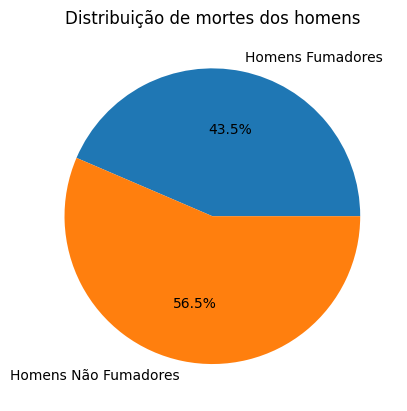

In [ ]:
homens = df[df['sex'] == 1]

homens = homens[homens['DEATH_EVENT'] == 1]

fumantes = homens[homens['smoking'] == 1]

Nfumantes = homens[homens['smoking'] == 0]

contagem = [len(fumantes), len(Nfumantes)]
rotulos = ['Homens Fumadores', 'Homens Não Fumadores']

plt.pie(contagem, labels=rotulos, autopct='%1.1f%%')
plt.title('Distribuição de mortes dos homens')
plt.show()

Bem, havia criado outra hipótese de que os homens fumantes seriam a maioria no caso de mortes devido a problemas cardíacos, por ter um senso comum ligado a isso, porém fui refutado pelos dados, pois a maior quantidade de casos de falecimentos são de homens que não fumam. Logo não teria uma correlação tão forte em você fumar e ter maiores chances de fatalidades cardíacas.

<Axes: xlabel='age', ylabel='Count'>

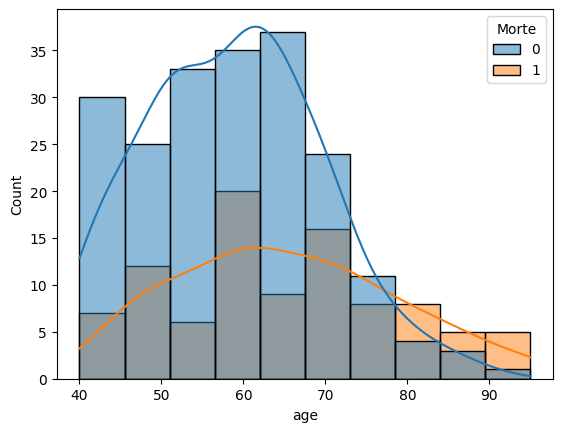

In [ ]:
# Transformar o DataFrame para o formato longo
df_longo = df.melt(id_vars=['age'], value_vars=['DEATH_EVENT'], var_name='Variavel', value_name='Morte')

# Agora pode usar o parâmetro 'hue'
sns.histplot(data=df_longo, x='age', hue='Morte', kde= True )

Isso cria a hipótese de que a partir dos 70 anos a tendência de morrer devido a problemas cardíacos é maior do que a de sobrevivência.

<Axes: ylabel='Count'>

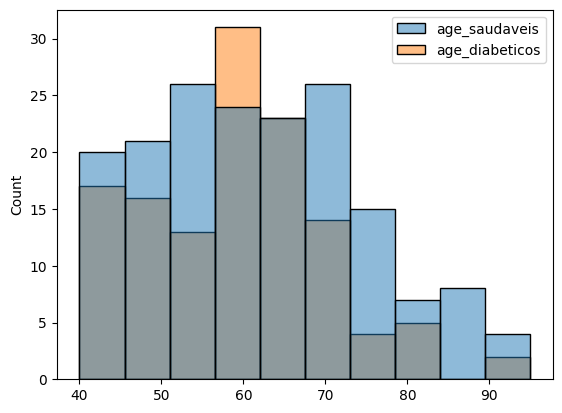

In [ ]:
diabetes = df[df['diabetes'] == 1]
diabetes = diabetes.rename(columns = {'age':'age_diabeticos'})

saudaveis = df[df['diabetes'] == 0]
saudaveis = saudaveis.rename(columns = {'age': 'age_saudaveis'})

sns.histplot([saudaveis['age_saudaveis'], diabetes['age_diabeticos']])

Por curiosidade, aqui está um gráfico da distribuição das diabetes em relação as idades.

<Axes: xlabel='time', ylabel='Count'>

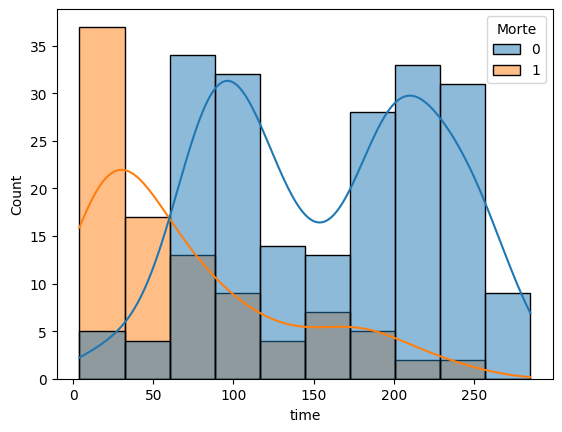

In [ ]:
df_longo = df.melt(id_vars=['time'], value_vars=['DEATH_EVENT'], var_name='Variavel', value_name='Morte')

sns.histplot(data=df_longo, x='time', hue='Morte', kde= True )

Esse gráfico representa a correlação entre o tempo e a morte.
Como podemos analisar, a maior parte dos pacientes que foram acompanhados por mais de 60 dias depois da falha cardíaca permaneceram vivos.